In [1]:
## Libreria de control
try:
  from control.matlab import *
except:
  !pip install control
  from control.matlab import *
    
## Libreria para graphicar
import matplotlib.pyplot as plt
import numpy

## Libreria para calculo simbolico
import sympy

## Libreria de control
import control

## Libreria para widgets
import ipywidgets as widgets

## Libreria para animaciones
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"#"jshtml"

## Libreria para importar Iframe de Youtube
from IPython.display import IFrame

# Diseño de controladores
_controlemos el mundo_

![](5-pinky-and-the-brain.jpg)

# Estabilizando una masa puntual

Dado un sistema lineal: 

$$\dot{x}=A\,x+B\,u \qquad y \qquad y=C\,x$$

- El dilema es que necesitamos $x$ pero lo único de tenemos es $y$
- El plan es diseñar el controlador $u$ como si tuvieramos $x$
- Decifrar $x$ a partir de $y$

**Paso #1** : Diseña la realimentación de estados usando el posicionamiento de polos. 

# Retomando la masa puntual

$$\dot{x}=A\,x+B\,u \qquad A=\left[\array{0&1\\0&0}\right] \qquad B=\left[\array{0\\1}\right]$$

Supongamos una realimentación de estados

$$u=-K\,x = - \left[\array{k_1&k_2}\right]x $$

¿Cómo seleccionamos la ganancia de los controladores?

**Idea:** Seleccionarlas para ubicar los polos del sistema en los valores deseados (_posicionamiento de polos_)

# Calculando los valores propios (polos)

Dada una matriz $M$, sus valores propios satisfacen la ecuación característica:

$$\chi M (\lambda) = \text{det}(\lambda\,I- M) = 0$$

Para una matriz $M$ (2x2):

$$M=\left[\array{ m_1 & m_2 \\ m_3 & m_4 }\right]$$

tendremos:

$$\lambda\,I- M = \lambda\left[\array{ 1 & 0 \\ 0 & 1 }\right]-M = \left[\array{ \lambda - m_1 & -m_2 \\ -m_3 & \lambda-m_4 }\right]$$

# Calculando los valores propios (polos) #2

Dada una matriz $M$, sus valores propios satisfacen la ecuación característica:

$$\chi M (\lambda) = \text{det}(\lambda\,I- M) = 0$$

continuando:

$$\text{det}(\lambda\,I- M) = \left|\array{ \lambda - m_1 & -m_2 \\ -m_3 & \lambda-m_4 }\right| $$
$$ = (\lambda - m_1)(\lambda-m_4)-m_2m_3$$
$$ = \lambda^2-(m_1+m_4)\lambda+m_1m_4-m_2m_3 = 0$$

# Calculando los valores propios (polos) #3

Dada una matriz $M$, sus valores propios satisfacen la ecuación característica:

$$\chi M (\lambda) = \text{det}(\lambda\,I- M) = 0$$

continuando:

$$\chi M (\lambda) = \lambda^2-(m_1+m_4)\lambda+m_1m_4-m_2m_3 = 0$$

de aquí tenemos:

$$\lambda = \frac{m1+m4}{2}\pm \sqrt{\frac{(m1+m4)^2}{4}-m_1m_4+m_2m_3}$$

¿Hay una forma más sencilla de hacer esto?

# # Calculando los valores propios (polos) #4

El teorema fundamental del algebra dice:

"_Las raices de un polinomio estan completamente determinadas por sus coeficientes_"

$$\chi M (\lambda) = \lambda^2-(m_1+m_4)\lambda+m_1m_4-m_2m_3 = 0$$

# Retomando la masa puntual #2

De $\dot{x}=A\,x+B\,u$ y $u=-K\,x$ tenemos que $\dot{x}=(A-BK)x$

entonces:

$$A-BK = \left[\array{0&1\\0&0}\right] - \left[\array{0\\1}\right]\left[\array{k_1&k_2}\right] = \left[\array{0&1\\-k_1&-k_2}\right]$$

luego,

$$\chi A-BK (\lambda) = \left|\array{\lambda&-1\\k_1&\lambda+k_2}\right| = \lambda^2+\lambda k_2+k_1$$

# Valores propios deseados

Seleccionemos los valores propios que queramos que el sistema en lazo cerrado tenga.

$$\lambda_1,\ldots,\lambda_n$$

Si estos son los valores propios del sistema entonces, el polinomio característico sería

$$\varphi(\lambda) = (\lambda-\lambda_1)(\lambda-\lambda_2)\cdots(\lambda-\lambda_n)=\prod_{i=1}^n(\lambda-\lambda_i)$$

Para el robot tomemos ambos valores propios como $-1$

$$\varphi(\lambda) = (\lambda+1)(\lambda+1) = \lambda^2+2\lambda+1$$

Ahora solo alineamos los coefficientes

# Alineando los coefficientes

De anteriores diapositivas:

$$\chi A-BK (\lambda) = \lambda^2+\lambda k_2+k_1$$

$$\varphi(\lambda) = (\lambda+1)(\lambda+1) = \lambda^2+2\lambda+1$$

alineando:

$$\array{
\lambda^1: & k_2 = 2\\
\lambda^2: & k_1 = 1} \qquad \text{entonces} \qquad K=\left[\array{1&2}\right]$$

# Posicionamiento de polos

Es seleccionar las ganancias del controlador de tal manera que los polos del sistema en lazo cerrado concuerden con los polos deseados. 

$$\array{ 
& \chi A-BK (\lambda) =& \lambda^n + a_{n-1}\lambda^{n-1}+\ldots+a_1\lambda+a_0\\ 
\varphi(\lambda) =& \prod_{i=1}^n(\lambda-\lambda_i) =& \lambda^n + b_{n-1}\lambda^{n-1}+\ldots+b_1\lambda+b_0}$$

Las ganacias del controlador saldrán del sistema de ecuaciones generado:

$$\array{
\lambda^n_1: & a_{n-1}(K) = b_{n-1}\\
&\vdots \\
\lambda^0: & a_0(K) = b_0}$$

# Preguntas sobre el posicionamiento de polos

- ¿Es siempre posible? no
- ¿Cómo seleccionamos el valor de los polos? es un arte
- ¿Tenemos que computar grandes determinantes? no

en MATLAB:

```
>> P = [lambda1,lambda2,lambda3,...];
>> K = place(A,B,P);
```

# Ejemplo

Dado el siguiente sistema ubicar los polos en $-1$,
$$\dot{x}=A\,x+B\,u \qquad A=\left[\array{2&0\\1&1}\right] \qquad B=\left[\array{1\\1}\right] \qquad u=-K\,x = - \left[\array{k_1&k_2}\right]x$$

El sistema en lazo cerrado:

$$A-BK = \left[\array{2-k_1&-k_2\\1-k_1&1-k_2}\right]$$

$$\chi A-BK(\lambda) = \left|\array{\lambda-2+k_1&k_2\\-1+k_1&\lambda-1+k_2}\right| = \lambda^2+\lambda\, (-3+k_1+k_2)+2-k_1-k_2$$

# Ejemplo

de la ecuación caracteristica y el polinomio. 

$$\array{ 
\chi A-BK (\lambda) =&  \lambda^2+\lambda\, (-3+k_1+k_2)+2-k_1-k_2\\ 
\varphi(\lambda) =& (\lambda+1)^2 \lambda^2 + 2\lambda+1}$$

asociando:

$$\array{
\lambda^1: & -3 + k_1 + k_2 = 2\\
\lambda^2: & 2 - k_1 - k_2  = 1} \qquad \to \qquad 
\array{
k_1 + k_2 = 5\\
k_1 + k_2 = 1}$$

Lo que ocurre con este ejemplo es una falta de controlabilidad, es decir, el efecto de las entradas no es lo suficientemente rico para influenciar el sistema. 

# Cómo elegir los polos

Asumiendo que tenemos suficiente autoridad en el control para hacer el posicionamiento de los polos. 

**no existe una única respuesta**

Algunas observaciones para tener en cuenta:

- Pares de polos complejos conjugados
  $$\text{Im}(\lambda_i)\neq 0 \to \exists \lambda_j : \text{Im}(\lambda_j)=-\text{Im}(\lambda_i), \text{Re}(\lambda_j)=\text{Re}(\lambda_i) $$
- Estabilidad 
  $$\text{Re}(\lambda_i) < 0, \forall \lambda_i $$
- Habrán oscilaciones
  $$\text{Im}(\lambda_i)\neq 0$$
- Tasa de convergencia

# Tasa de convergencia ~ tiempo de respuesta

Teniendo,

$$\dot{x} = (A-BK)\, x,\qquad \text{Re}(\lambda)<0, \qquad \forall\lambda \in \text{eig}(A-BK)$$

el valor propio más pequeño dominará la tasa de convergencia ~ tiempo de respuesta:

$$\lambda{min} = \text{argmin}_\lambda|\text{Re}(\lambda)|$$

entre más grandes los valores de los polos, más grandes las ganancias del controlador y las señales de control. 

# Del ejemplo anterior en MATLAB

```matlab
% Matrices del sistema
  A = [2,0;1,-1]; 
  B = [1;1];

% Selecionemos los polos
  P = [-0.5+1i,-0.5-1i];

% Realicemos el posicionamiento de polos
  K = place(A,B,P);

% Calculemos la solución
  x=[1;1]; t=0; tf=30; dt=0.01;
  X=[]; T=[];
  
while (t<tf)
    x = x+dt.*(A-B*K)*x;
    t = t+dt;
    X = cat(2,X,x);
    T = cat(2,T,t);
end

plot(T,X)
```

# Controlabilidad

- ¿Cuando podemos hacer posicionamiento de polos usando la realimentación de estados?
- ¿Cuando la matriz $B$ (la configuración de los actuadores) es suficientemente rica para hacer que el sistema haga lo que nosotros queramos? 
- Las respuestas a estas preguntas reposan sobre el concepto de controlabilidad...

# Un ejemplo modesto

- Dado un sistema en tiempo discreto:
  $$x_{k+1}= A\, x_k + B\, u_k\qquad x_0 = 0$$
- Es posible llevar el sistema en un número $n$ de pasos hacia un punto particular en el espacio $x^\star$

![](5-camino-0-star.png)

# Un ejemplo modesto

$$\array{
x_1 &=& Ax_0 + Bu_0 &=& Bu_0\\
x_2 &=& Ax_1 + Bu_1 &=& ABu_0 + Bu_1\\
x_3 &=& Ax_2 + Bu_2 &=& A^2Bu_0+ ABu_1 + Bu_2\\
&&\vdots\\
x_n &=& Ax_{n-1} + Bu_{n-1} &=& A^{n-1}Bu_0 + \cdots + Bu_{n-1}
}$$

de aquí podemos ver que: 

$$x^\star = \left[\array{B&AB&\cdots&A^{n-1}B}\right] \left[\array{u_{n-1}\\\vdots\\u_1\\u_0}\right] = \Gamma \left[\array{u_{n-1}\\\vdots\\u_1\\u_0}\right]$$

# Un ejemplo modesto

Es posible llegar a un estado $x^\star$ si y solo si:

$$\text{rank}\left(\Gamma\right) = n$$

Esto se generaliza fácilmente.

# Controlabilidad : Teorema 1

Para un sistema $\dot{x}=Ax+Bu, x \in \mathscr{R}^n$

**Definición** El sistema es completamente controlable (CC) si es posible ir de cualquier estado inicial a cualquier estado final. 

$$\Gamma = \left[\array{B&AB&\cdots&A^{n-1}B}\right] \qquad \text{Matriz de controlabilidad}$$

**Teorema 1** El sistema es completamente controlable (CC) si y solo si 

$$\text{rank}\left(\Gamma\right) = n$$

```rank(M) = ``` al número de filas o columnas independientes de M 

# Dos sistemas

**Sistema #1**

$$\dot{x}=\left[\array{2&0\\1&1}\right]x+\left[\array{1\\1}\right]u \qquad n=2 \qquad \Gamma = \left[\array{B&AB}\right] $$

en donde,

$$AB = \left[\array{2\\2}\right] \quad \Gamma = \left[\array{1&2\\1&2}\right] \quad \to \quad \text{rank}\left(\Gamma\right) = 1 $$

**Sistema #2**

$$\dot{x}=\left[\array{0&1\\0&0}\right]x+\left[\array{0\\1}\right]u \qquad n=2 \qquad \Gamma = \left[\array{B&AB}\right] $$

en donde,

$$AB = \left[\array{1\\0}\right] \quad \Gamma = \left[\array{0&1\\1&0}\right] \quad \to \quad \text{rank}\left(\Gamma\right) = 2 $$

El sistema #1 no es CC, el sistema #2 es CC

# Controlabilidad : Teorema 2

asumiendo lo siguiente:

$$u = -Kx \qquad\qquad \dot{x}=(A-BK)x$$

**Teorema 2** El posicionamiento de polos a valores arbitrarios es posible si y solo si el sistema es CC. 

# Punto a punto vs. trayectorias

$$\dot{x}=\left[\array{0&1\\0&0}\right]\,x+\left[\array{0\\1}\right]\,u $$

en MATLAB:

```matlab
>> G = ctrb(A,B);
>> rank(G); 
   ans: 2
```

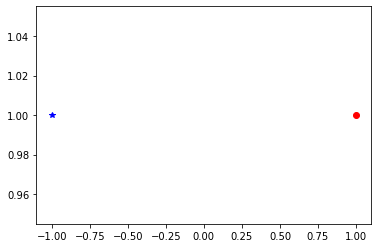

In [10]:
plt.plot(-1,1,'*b');
plt.plot(1,1,'or');

# Observadores

Sabemos diseñar controladores efectivamente usando la realimentación del estado. Pero como hacemos con $y$ ? 

A partir de la medida $y$ debemos encontrar los estados del sistema $x$ a traves de una predición $\hat{x}$.

# Predictor-Corrector

Supongamos un sistema:

$$\dot{x}=A\,x \qquad y=C\, x$$

1. **Primer idea** hagamos una copia del sistema (predictor):
    $$\dot{\hat{x}}= A\, \hat{x}$$
2. **Segunda idea** agreguemos la noción de cuan mal estimamos el modelo (correcto). 
    $$\dot{\hat{x}}= A\, \hat{x} + L(y-C\, \hat{x})$$
    
Esto se conoce como el observador de **Luenberger**

# Elegiendo la ganancia del observador

Lo que queremos estabilizar (llevar a cero) es la estimación del error, es decir, la diferencia del estado actual y la estimación del estado $e=x-\hat{x}$

$$\dot{e} = \dot{x} - \dot{\hat{x}} = Ax - A\hat{x} - L(y-C\hat{x}) \qquad \text{con} \qquad y=Cx$$

luego,

$$\dot{e} = A(x-\hat{x}) - LC(x-\hat{x}) = (A-LC)e$$

por lo que debemos elegir L de tal forma que los valores propios de $A-LC$ tenga parte real negativa. 



## Nuevamente posicionamiento de polos


$$\dot{e} = (A-LC)e$$

queremos 

$$\text{Re}\left(\text{eig}(A-LC)\right)<0$$

ya sabemos hacer posicionamiento de polos. 

# Ejemplo

Partimos de: 

$$\dot{x} = \left[\array{-1&2\\0&-2}\right]x \qquad y = \left[\array{1&-1}\right]x$$

el error será:

$$\dot{e} = (A-LC)e = \left(\left[\array{-1&2\\0&-2}\right]-\left[\array{L_1\\L_2}\right]\left[\array{1&-1}\right]\right)e$$
$$\dot{e}= \left[\array{-1-L_1&2+L_1\\-L_2&-2+L_2}\right]e$$

# Ejemplo 

$$\dot{e}= \left[\array{-1-L_1&2+L_1\\-L_2&-2+L_2}\right]e$$

Ecuación característica:

$$\chi A-LC (\lambda) = \left|\array{\lambda+1+L_1&-2-L_1\\L_2&\lambda+2-L_2}\right|$$
$$\chi A-LC (\lambda) = \lambda^2 + \lambda (3+L_1-L_2) + 2 + 2L_1+L_2$$

$$\varphi(\lambda) = (\lambda+1)^2 = \lambda^2 + 2\lambda+1$$

de aquí:

$$L_1 = -2/3 \qquad \text{y} \qquad L_2=1/3$$

# Ejemplo

$$\dot{\hat{x}} = A\hat{x} + \frac{1}{3}\left[\array{-2\\1}\right](y-C\,\hat{x})$$

$$\dot{x} = \left[\array{-1&2\\0&-2}\right]x \qquad y = \left[\array{1&-1}\right]x$$

Podemos diseñar observadores todo el tiempo? 

# Observabilidad

Necesitamos hacer lo que hicimos para el diseño del controlador para entender cuando podemos recuperar la información del estado de la salidad. 

# Un ejemplo modesto

- Dado un sistema en tiempo discreto:
  $$x_{k+1}= A\, x_k \qquad y_k = C x_k$$
  
- ¿Podemos recuperar la condición inicial recolectando n valores de salida? 

$$
\array{
y_0 &=& Cx_0 \\
y_1 &=& Cx_1 &=& CAx_0 \\
&\vdots\\
y_{n-1} &=& Cx_{n-1} &=& CA^{n-1}x_0
}
$$

# La matriz de observabilidad

$$\left[\array{y_0\\y_1\\y_2\\\vdots\\y_{n-1}}\right] = \left[\array{C\\CA\\CA^2\\\vdots\\CA^{n-1}}\right]\,x_0 = \Omega x_0$$

donde $\Omega$ es la matriz de observabilidad. La condición inicial del sistema puede ser recuperadad de las medidas/salidas del sistema cuando la matriz de observabilidad tiene rango completo. 

# Observabilidad : Teorema 1

Dado un sistema: 

 $$x_{k+1}= A\, x_k \qquad y_k = C x_k \qquad x \in \mathscr{R}^n$$
 
**Definición** el sistema es completamente observable (CO) si es posible recuperar la condicion inicial a partir de su salida.

$$\Omega = \left[\array{C\\CA\\CA^2\\\vdots\\CA^{n-1}}\right]$$

**Teorema 1** el sistema es CO si y solo si 

$$\text{rank}\left(\Omega\right) = n$$

# Observabilidad : Teorema 2

Dado un estimador:

$$\dot{\hat{x}}= A\, \hat{x} + L(y-C\, \hat{x}) \qquad \dot{e} = (A-LC)e$$ 

**Teorema 2** se puede hacer un posicionamiento de polos arbitrariamente si y solo if el sistema es CO.

# El principio de separación 

Estamos muy cerca de poder diseñar controladores como si tuvieramos el estado $x$ aunque solo conozcamos $y$, ya que podemos estimar $x$.

En este momento tenemos muchos buenos bloques para construir un controlador: 

- Controlabilidad
- Observabilidad
- Realimentación del estado
- Observadores
- Posicionamiento de polos

¿Cómo ponemos todo esto juntos? 

El principio de separación 

# Lista de pasos para diseñar un controlador

Tenemos un sistema:

$$\dot{x}=Ax+Bu \qquad y=Cx$$

asumiendo CC y CO.

**Paso 1** Diseñamos un control en realimentación de estado como si conocieramos $x$.

$$u=-Kx \quad\to\quad \dot{x} = (A-BK)x$$

aunque solo conozcamos $\hat{x}$

$$u=-K\hat{x}$$

**Paso 2** Estimar $x$ usando un observador (en este caso también contiene $u$).

$$\dot{\hat{x}}=A\hat{x}+Bu+L(y-C\hat{x})$$

encontrando $L$ para:

$$\dot{e}=(A-LC)e$$

# Esto funciona? 

Queremos estabilizar ambos $x$ y $e$. Analizemos la dinámica conjunta. 

$$\dot{x} = Ax - BK \hat{x} = Ax - BK(x-e)= (A-BK)x + BK e$$
$$\dot{e} = (A-LC)e \qquad e= x-\hat{x}$$

Podemos verlo en conjunto:

$$\left[\array{\dot{x}\\\dot{e}}\right]=\left[\array{A-BK&BK\\0&A-LC}\right]\left[\array{x\\e}\right]$$

Esta estrategia funciona si y solo si la matriz anterior genera un sistema asintóticamente estable. 

# El principio de separación

$$\left[\array{\dot{x}\\\dot{e}}\right]=\left[\array{A-BK&BK\\0&A-LC}\right]\left[\array{x\\e}\right]=M\left[\array{x\\e}\right]$$

Para esta matriz triangular superior. Sus valores propios estan dados por los valores propios de los bloques diagonales. 

$$\chi M(\lambda) = \chi A-BK (\lambda) \, \chi A-LC (\lambda)$$

Si no nos equivocamos en el diseño, tendremos qué: 

$$\text{Re}\left(\text{eig}(A-BK)\right)<0$$
$$\text{Re}\left(\text{eig}(A-LC)\right)<0$$

Es decir que todo funciona.

# El principio de separación

- Este impresionante hecho se conoce como el principio de separación. 
- Significa que podemos diseñar controladores si conocemos $x$.
- Podemos diseñar observadores independientemente de las acciones del control.
- El diseño de los observadores y controladores puede realizarse separadamente. 

# Consideraciones prácticas

El principio de separación significa que podemos desacoplar el diseño del controlador del diseño del observador (en teoría).

```
“In theory, theory and practice are the
same. In practice they are not.” -Yogi Berra
```

<img src ="https://pristineauction.s3.amazonaws.com/17/173466/main_1-Yogi-Berra-Signed-Yankees-8x10-Lithograph-JSA-COA-PristineAuction.com.jpg" width="150px">

## Selección de los polos / valores propios

Típicamente el observador debe ser más rápido que el controlador, ya que el controlador no hará nada útil mientras que la estimación del estado no esté cerca del estado. 

**Nota** Grandes valores de los valores propios del observador generan grandes ganancias en el observador, lo que no es un problema ya que el observador es una construcción computacional. 

![](5-observador-controlador.png)

# Seguimiento del objetivo 